In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import copy
import operator
import collections
import pandas as pd

In [2]:
# check is the same point
def is_same_niche(a,b):
    #function_period = 2*np.pi/(2*5.1*np.pi)
    distance = np.abs(a-b)
    if distance < NICHE_RADIUS:    #0.5*function_period
        return True
    else:
        return False
# this method is used to delete repeat points
def delete_repeat_niche(points):
    if len(points) == 1:
        return points
    elif len(points) == 0:
        return points
    back_up = []
    back_up.append(points.pop())
    while len(points) != 0:
        current_point = points.pop()
        check_value = []
    
        for i in range(len(back_up)):
        #check distance between current points and previous points
            temp_flag = is_same_niche(back_up[i],current_point)
            check_value.append(str(temp_flag))
    
        if 'True' in check_value:
            pass
        else:
            back_up.append(current_point)
    return back_up

In [3]:
def share_function(metric_d):
    # constants sigma share and alpha 
    sigma_share = NICHE_RADIUS
    #alpha = 1
    
    if metric_d < sigma_share:
        share = 1 - np.power(metric_d/sigma_share, NICHE_ALPHA_SHARE)
    else:
        share = 0
    return share

In [4]:
def share_fitness(population, fitness):
    niche_count = niche_count_m(population)
    shared_fitness = np.divide(fitness, niche_count)
    return shared_fitness

In [6]:
def niche_count_m(population):
    population_decimal = binary2decimal_batch(population)
    niche_count_m = []
    for i in range(len(population_decimal)):
        niche_count_m_individual = 0
        current_string = population_decimal[i]
        population_decimal_image = copy.deepcopy(population_decimal)
        #population_decimal_image.remove(population_decimal_image[i])
        for j in range(len(population_decimal_image)):
            niche_count_m_individual += share_function(metric_space(current_string,population_decimal_image[j]))
        niche_count_m.append(niche_count_m_individual)
    return niche_count_m

In [7]:
def metric_space(x_i, x_j):
    return np.abs(x_i - x_j)

In [8]:
def rouletteMethod(weights):
    #print("roulette method")
    weightsSum = sum(weights)
    norm_weights = list(map(lambda x: x/weightsSum,weights))

    # obtain mass probability function
    mass = []
    for i in range(len(norm_weights)):
        temp = sum(norm_weights[0:i+1])
        mass.append(temp)

    # generate random values, kind of monto carlo
    random_value = np.random.uniform()
    i = 0
    while i<len(mass):
        if random_value <= mass[0]:
            temp = 0
            break
        if random_value > mass[i] and random_value <= mass[i+1]:
            temp = i+1
            break
        i +=1
    return int(temp)

In [9]:
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = np.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring
def mutation(offspring_crossover):
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        weight_max = 2
        weight_min = -2
        mutation_constant = 0.8
        for i in range(offspring_crossover.shape[1]):
            pos = np.random.randint(0,100,1)%2
            if np.random.randint(0,4,1)%2 == 0:
                offspring_crossover[idx,pos]=offspring_crossover[idx,pos]+mutation_constant*(weight_max-offspring_crossover[idx,pos])*np.random.random()
            else:
                offspring_crossover[idx,pos]=offspring_crossover[idx,pos]-mutation_constant*(offspring_crossover[idx,pos]-weight_min)*np.random.random()
    return offspring_crossover
def get_individual_fitness(individual):
    decimal_value = binary2domain(individual)
    fitness = target_function(decimal_value)
    #fitness = get_function1_value(decimal_value)
    return fitness
def get_individual_fitness_decimal(individual):
    return target_function(individual)
    #return get_function1_value(individual)

def get_population_fitness(population):
    fitness = []
    for i in range(population.shape[0]):
        temp = get_individual_fitness(population[i])
        fitness.append(temp)
    return fitness

In [10]:
def target_function(decimal_value):
    step1 = np.power(decimal_value-0.0667,2)
    step2 = np.divide(step1,0.64)
    step3 = np.multiply(step2,-4*np.log(2))
    step3 = np.power(np.e,step3)
    return np.multiply(get_function1_value(decimal_value),step3)
def get_function1_value(individual):
    temp = np.sin(5.1*np.pi*individual+0.5)
    fitness = np.power(temp,6)
    return fitness

In [ ]:
"""
fig = plt.figure(111)
axes1 = fig.add_subplot(111)
x = np.arange(-1,1,0.01)
y = list(map(lambda i: get_individual_fitness_decimal(i),x))
axes1.plot(x,y)
"""
print("")

In [11]:
def binary2decimal(chromesome):
    decimal = 0
    length = len(chromesome)
    for i in range(length):
        decimal = decimal + chromesome[i]*np.power(2,length-i-1)
    return decimal
def binary2domain(chromesome):
    decimal = binary2decimal(chromesome)
    embedding_value = (1+decimal)/np.power(2,16)
    return embedding_value

In [12]:
def binary2decimal_batch(population):
    decimal_batch = []
    for i in range(population.shape[0]):
        decimal = binary2domain(population[i].tolist())
        decimal_batch.append(decimal)
    return decimal_batch

In [13]:
def check_local_maximam_value(point,radius=0.01):
        if np.abs(np.subtract(point,0.071563))<radius:
            return True
        elif np.abs(np.subtract(point,0.262969))<radius:
            return True
        elif np.abs(np.subtract(point,0.457061))<radius:
            return True
        elif np.abs(np.subtract(point,0.654830))<radius:
            return True
        else:
            return False

In [14]:
def getBestOutputNumber(population):
    bestOutputNumber = 0
    decimal_batch_ = list(set(binary2decimal_batch(population)))
    for i in decimal_batch_:
        if check_local_maximam_value(i,radius=0.01):
            bestOutputNumber = bestOutputNumber+1        
    return bestOutputNumber
def getApparentReliability(population):
    if getBestOutputNumber(population)>0.99:
        return 1;
    else:
        return 0;
def getPopulationRichness(population,radius):
    population_richness = 0
    decimal_batch_ = list(set(binary2decimal_batch(population)))
    for i in decimal_batch_:
        if check_local_maximam_value(i,radius):
            population_richness = population_richness + 1
    return population_richness
    

In [ ]:
"""
def select_mating_pool(pop, fitness, num_parents): 
    fitness_counter_dict = collections.Counter(fitness)
    print(fitness_counter_dict)
    fitness_individual_binary_code_dict = {}
    for i in range(len(fitness)):
        fitness_individual_binary_code_dict[fitness[i]]=pop[i,:]
    sum_fitness = np.sum(fitness)
    average_fitness = np.divide(sum_fitness,pop.shape[0])
    
    fitness_probability_dict = {}
    for i in range(len(fitness)):
        fitness_probability_dict[fitness[i]] = np.divide(fitness[i],average_fitness)
    #print(fitness_probability_dict)   
    fitness_next_generation_number_dict = {}
    
    parents_number = 0
    for i in range(len(fitness)):
        number = np.multiply(fitness_probability_dict[fitness[i]],fitness_counter_dict[fitness[i]])
        fitness_next_generation_number_dict[fitness[i]] = int(number)
        parents_number += int(number)
        #print(int(number))
    #print(fitness_next_generation_number_dict)
    parents = np.zeros((parents_number, pop.shape[1]),int)
    #print(parents.shape)
    #print("this is parents", parents)
    population_index = 0
    for i in range(len(fitness)):
        for j in range(fitness_next_generation_number_dict[fitness[i]]):
            parents[j+population_index, :] = fitness_individual_binary_code_dict[fitness[i]]
        population_index += int(fitness[i])
    return parents
"""
print(4)

In [15]:
def select_mating_pool(pop, fitness, num_parents):
    
    total_share_fitness = np.sum(fitness)
    average_share_fitness = np.divide(total_share_fitness,pop.shape[0])
    fitness_copy = copy.deepcopy(fitness)
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        # return data type is tuple
        max_fitness_idx = np.where(fitness_copy == np.max(fitness_copy))
        max_fitness_idx = max_fitness_idx[0][0]
        max_fitness_idx = rouletteMethod(fitness)
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness_copy[max_fitness_idx] = -99999999999
    return parents

In [16]:
def stochastic_remainder_selection(parentPopulation,shareFitness):
    average = np.divide(np.sum(shareFitness.tolist()),shareFitness.shape[0])
    expected_number = np.divide(shareFitness,average)
    fitnessPopulationDict = {'fitness':shareFitness.tolist(),
                             'expected_number':expected_number,'population':parentPopulation.tolist()}
    fitnessPopulationPd = pd.DataFrame(fitnessPopulationDict)

    expected_number_list = fitnessPopulationPd['expected_number'].tolist()
    for i in range(len(expected_number)):
        expected_number_list[i] = int(expected_number_list[i])
    parents_number = np.sum(expected_number_list)
    parents = np.zeros((parents_number, parentPopulation.shape[1]),int)

    populationIndex = 0
    for i in range(50):
        expected_number = int(fitnessPopulationPd.iloc[i,1])
        for j in range(expected_number):
            parents[j+populationIndex, :] = fitnessPopulationPd.iloc[i,2]
        populationIndex += expected_number
    return parents

In [17]:
def tournament_method(population,fitness,tournament=2,parent_number=35):
    
    fitnessPopulationDict = {'fitness':shareFitness.tolist(),
                             'population':parentPopulation.tolist()}
    fitnessPopulationPd = pd.DataFrame(fitnessPopulationDict)
    populationSize = population.shape[0]
    parents = np.zeros((parent_number, parentPopulation.shape[1]),int)
    for i in range(parent_number):
        tournament_individual_index = np.random.randint(0,populationSize,(tournament,))
        tournament_individual_fitness = fitnessPopulationPd.iloc[tournament_individual_index,0].tolist()

        tournament_individual_index_fitness=list(zip(tournament_individual_index,tournament_individual_fitness))
        tournament_champion = max(tournament_individual_index_fitness,key=lambda x: x[1])
        tournament_champion_chromsome = fitnessPopulationPd.iloc[tournament_champion[0],1]
        parents[i,:] = tournament_champion_chromsome
    return parents

bestOuptputNumber is:  13
apparent 1
This is decimal value [0.0792083740234375, 0.2662506103515625, 0.0713958740234375, 0.4626312255859375, 0.6764068603515625, 0.4615631103515625, 0.0798187255859375, 0.4620208740234375, 0.0787506103515625, 0.2667083740234375, 0.2673187255859375, 0.6768646240234375, 0.0709381103515625]
niche number is [0.0709381103515625, 0.2667083740234375, 0.6764068603515625, 0.4620208740234375]
richness is:  13


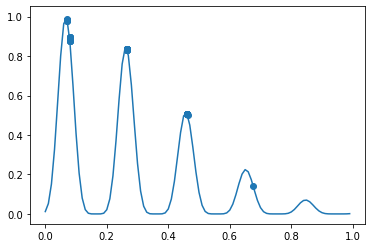

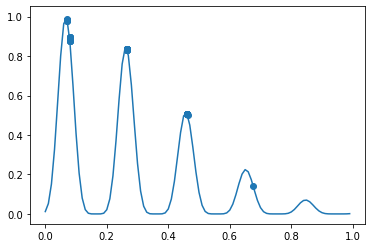

In [36]:

GENERATION = 10
POPULATION = 50
CHROME_LENGTH = 16
pop_size  = (POPULATION,CHROME_LENGTH)
parentPopulation = np.random.randint(0,2,pop_size)
BEST_OUTPUTS=[]
ELITIST_PERCENT = 0.8
NICHE_RADIUS = np.pi/(2*5.1*np.pi)
NICHE_ALPHA_SHARE = 1


for i in range(GENERATION):
    fitness = get_population_fitness(parentPopulation)
    parent_population_backup = copy.deepcopy(parentPopulation)
    shareFitness = share_fitness(parentPopulation, fitness)
    #BEST_OUTPUTS.append(max(fitness))
    parents = select_mating_pool(parentPopulation, shareFitness, int(ELITIST_PERCENT*POPULATION))
    #parents = stochastic_remainder_selection(parentPopulation,shareFitness)
    #parents = tournament_method(parentPopulation,shareFitness)
    offspringCrossover = crossover(parents,
                                    offspring_size=(pop_size[0]-parents.shape[0], CHROME_LENGTH))
    #offspring_mutation = mutation(offspring_crossover)
    parentPopulation[0:parents.shape[0], :] = parents
    #parent_population[parents.shape[0]:, :] = offspring_mutation
    parentPopulation[parents.shape[0]:, :] = offspringCrossover
    
#matplotlib.pyplot.plot(BEST_OUTPUTS)
bestOuptputNumber = getBestOutputNumber(parent_population_backup)
print("bestOuptputNumber is: ",bestOuptputNumber)
APPARENT_RELIABILITY = getApparentReliability(parent_population_backup)
print("apparent",APPARENT_RELIABILITY)
#NORMALIZED_COST = POPULATION*GENERATION/APPARENT_RELIABILITY
#parent_population_backup = np.random.randint(0,2,pop_size)
decimal_batch_ = list(set(binary2decimal_batch(parentPopulation)))
print("This is decimal value",decimal_batch_)
decimal_batch = binary2decimal_batch(parent_population_backup)
#print(set(decimal_batch))
niche = delete_repeat_niche(list(set(decimal_batch)))
print("niche number is",niche)
richness = getPopulationRichness(parent_population_backup,0.02)
print("richness is: ",richness)

fig = plt.figure(111)
axes1 = fig.add_subplot(111)
x = np.arange(0,1,0.01)
y = list(map(lambda i: get_individual_fitness_decimal(i),x))
axes1.plot(x,y)
axes1.scatter(decimal_batch,fitness)
fig

In [24]:
np.pi/(2*5.1*np.pi)

0.09803921568627452

In [47]:
for i in [1/3,1/2,1,2,3]:
    NICHE_ALPHA_SHARE = i
    # parameter of share function**************
    NICHE_RADIUS = np.pi/(2*5.1*np.pi)
    RUNTIMES = 1
    #NICHE_ALPHA_SHARE = 1
    # Criterion*************************** 
    APPARENT_RELIABILITY = 0
    NORMALIZED_COST = 0
    AVERAGE_OPTIMAL_NUMBER = 0
    POPULATION_RICHNESS = 0
    POPULATION_RICHNESS_1_8 = 0
    POPULATION_RICHNESS_2_8 = 0
    POPULATION_RICHNESS_4_8 = 0
    POPULATION_RICHNESS_7_8 = 0
    NICHE_NUMBER = 0
    #*************************************
    best_output_number_all = 0
    apparent_reliability_all = 0
    niche_number_all = 0
    population_richness_all = 0
    population_richness_7_8_niche_radius_all=0
    population_richness_4_8_niche_radius_all=0
    population_richness_2_8_niche_radius_all=0
    population_richness_1_8_niche_radius_all=0
    #*************************************
    for i in range(RUNTIMES):
        GENERATION = 10
        POPULATION = 50
        CHROME_LENGTH = 16
        pop_size  = (POPULATION,CHROME_LENGTH)
        parent_population = np.random.randint(0,2,pop_size)
        BEST_OUTPUTS=[]
        ELITIST_PERCENT = 0.8


        for i in range(GENERATION):
            fitness = get_population_fitness(parent_population)
            parent_population_backup = copy.deepcopy(parent_population)
            shareFitness = share_fitness(parent_population, fitness)
            #BEST_OUTPUTS.append(max(fitness))
            parents = select_mating_pool(parent_population, shareFitness, int(ELITIST_PERCENT*POPULATION))
            #parents = tournament_method(parentPopulation,shareFitness)
            offspring_crossover = crossover(parents,
                                            offspring_size=(pop_size[0]-parents.shape[0], CHROME_LENGTH))
            #offspring_mutation = mutation(offspring_crossover)
            parent_population[0:parents.shape[0], :] = parents
            #parent_population[parents.shape[0]:, :] = offspring_mutation
            parent_population[parents.shape[0]:, :] = offspring_crossover

        #matplotlib.pyplot.plot(BEST_OUTPUTS)
        best_ouput_number_onetime = getBestOutputNumber(parent_population_backup)
        best_output_number_all += best_ouput_number_onetime

        apparent_reliability_onetime = getApparentReliability(parent_population_backup)
        apparent_reliability_all += apparent_reliability_onetime

        population_richness_onetime = getPopulationRichness(parent_population_backup,0.02)
        population_richness_all += population_richness_onetime
        
        population_richness_1_8_niche_radius_one_time = getPopulationRichness(parent_population_backup,1/256)
        population_richness_1_8_niche_radius_all += population_richness_1_8_niche_radius_one_time
        population_richness_2_8_niche_radius_one_time = getPopulationRichness(parent_population_backup,4/256)
        population_richness_2_8_niche_radius_all += population_richness_2_8_niche_radius_one_time
        population_richness_4_8_niche_radius_one_time = getPopulationRichness(parent_population_backup,32/256)
        population_richness_4_8_niche_radius_all += population_richness_4_8_niche_radius_one_time
        population_richness_7_8_niche_radius_one_time = getPopulationRichness(parent_population_backup,128/256)
        population_richness_7_8_niche_radius_all += population_richness_7_8_niche_radius_one_time
        
        
        decimal_batch = binary2decimal_batch(parent_population_backup)
        niche_number_onetime = len(delete_repeat_niche(list(set(decimal_batch))))
        niche_number_all += niche_number_onetime

    APPARENT_RELIABILITY = apparent_reliability_all/RUNTIMES
    NORMALIZED_COST = POPULATION*GENERATION/APPARENT_RELIABILITY
    AVERAGE_OPTIMAL_NUMBER = best_output_number_all/RUNTIMES
    POPULATION_RICHNESS = population_richness_all/RUNTIMES
    POPULATION_RICHNESS_1_8 = population_richness_1_8_niche_radius_all/RUNTIMES
    POPULATION_RICHNESS_2_8 = population_richness_2_8_niche_radius_all/RUNTIMES
    POPULATION_RICHNESS_4_8 = population_richness_4_8_niche_radius_all/RUNTIMES
    POPULATION_RICHNESS_7_8 = population_richness_7_8_niche_radius_all/RUNTIMES
    NICHE_NUMBER = niche_number_all/RUNTIMES
    print("the argument is the following: \n","apparent_reliability="+str(APPARENT_RELIABILITY),
          "normalized_cost="+str(NORMALIZED_COST),"best_output_number="+str(AVERAGE_OPTIMAL_NUMBER),
          "\n population_richness_1_8="+str(POPULATION_RICHNESS_1_8),
          "population_richness_2_8="+str(POPULATION_RICHNESS_2_8),
          "\n population_richness_4_8="+str(POPULATION_RICHNESS_4_8),
          "population_richness_7_8="+str(POPULATION_RICHNESS_7_8),
          "\n niche_number="+str(NICHE_NUMBER))
   

the argument is the following: 
 apparent_reliability=1.0 normalized_cost=500.0 best_output_number=4.0 
 population_richness_1_8=3.0 population_richness_2_8=6.0 
 population_richness_4_8=23.0 population_richness_7_8=23.0 
 niche_number=4.0
the argument is the following: 
 apparent_reliability=1.0 normalized_cost=500.0 best_output_number=7.0 
 population_richness_1_8=0.0 population_richness_2_8=7.0 
 population_richness_4_8=19.0 population_richness_7_8=19.0 
 niche_number=4.0
the argument is the following: 
 apparent_reliability=1.0 normalized_cost=500.0 best_output_number=16.0 
 population_richness_1_8=5.0 population_richness_2_8=16.0 
 population_richness_4_8=16.0 population_richness_7_8=16.0 
 niche_number=3.0
the argument is the following: 
 apparent_reliability=1.0 normalized_cost=500.0 best_output_number=9.0 
 population_richness_1_8=5.0 population_richness_2_8=13.0 
 population_richness_4_8=14.0 population_richness_7_8=14.0 
 niche_number=3.0
the argument is the following: 
 appa

In [ ]:
def share_function(metric_d,alpha):
    # constants sigma share and alpha 
    sigma_share = 1
    
    if metric_d < sigma_share:
        share = 1 - np.power(metric_d/sigma_share, alpha)
    else:
        share = 0
    return share

In [ ]:
fig = plt.figure(111)
axes2 = fig.add_subplot(111)
x = np.arange(0,1.5,0.01)
y1 = list(map(lambda i: share_function(i,0.5),x))
y2 = list(map(lambda i: share_function(i,1/3),x))
y3 = list(map(lambda i: share_function(i,1),x))
y4 = list(map(lambda i: share_function(i,2),x))
y5 = list(map(lambda i: share_function(i,3),x))
axes2.plot(x,y1)
axes2.plot(x,y2)
axes2.plot(x,y3)
axes2.plot(x,y4)
axes2.plot(x,y5)
axes2.axis([0,1.5,0,1])
fig

In [ ]:
import collections

In [ ]:
"""
b = collections.Counter(shareFitness)
class_k = len(b.items()) 
sum_fitness = np.sum(shareFitness)
average_fitness = np.divide(sum_fitness,50)
each_class_survive_probability = np.divide(shareFitness,average_fitness)
#print(each_class_survive_probability)

next_generation_number = []
for i in range(len(each_class_survive_probability)):
    next_generation = np.multiply(b[shareFitness[i]],each_class_survive_probability[i])
    next_generation_number.append(int(next_generation))
#print(np.sum(each_class_survive_probability))
#print(class_k)
#print(np.sum(next_generation_number))

parents = np.zeros((50, 16),int)
population_index = 0
for i in range(len(next_generation_number)):
    for j in range(next_generation_number[i]):
        parents[j+population_index, :] = parent_population_backup[i, :]
        #print(parent_population_backup[i,:])
    population_index += next_generation_number[i]
print(population_index)
print(parents)
"""
print(a)

In [ ]:
#pic1
power_index = [1.1,1.6,2.1,2.6,3.1,3.6,4.1]
R = [0.98,0.98,0.98,1.00,0.98,0.96,0.98]
C = [2040,2040,2040,2000,2040,2083,2040]
O_n = [4.08,5.10,5.18,5.16,4.70,4.50,4.86]
P_r = [12.24,13.36,12.06,10.2,9.32,8.22,8.44]
N_n = [5.42,5.52,5.12,4.66,4.44,4.12,4.18]

fig,ax1=plt.subplots()

ax1.plot(power_index,P_r,color="blue",label=r'$P_r$')
#ax1.axis([0.5,3,0,15])
ax1.set_ylabel(r'$P_r$',fontsize=14)
plt.xlabel(r'$d_{constant}$',fontsize=14)

ax2 = ax1.twinx()
ax2.plot(power_index,O_n,color="red",label=r'$O_n$')
ax2.plot(power_index,N_n,color="green",label=r'$N_n$')
ax2.axis([0.5,3,1,6])
ax2.set_ylabel(r'$O_n$ and $N_n$',fontsize=14)
fig.legend(loc='upper center',bbox_to_anchor=(0.8,0.6),fontsize=14)